# Algoritmos de Grafos

In [2]:
import pandas as pd
from collections import deque
from graphviz import Source

## 🔍 Depth-First Search (DFS)

**DFS (Depth-First Search)** es un algoritmo de búsqueda y recorrido utilizado en grafos (tanto dirigidos como no dirigidos). Comienza en un nodo raíz y explora tan lejos como sea posible a lo largo de cada rama antes de retroceder.

### 📌 Características:

- Usa una **pila** (stack) para recordar los vértices por visitar (puede ser explícita o mediante recursión).
- Es útil para:
  - Detectar ciclos en un grafo.
  - Clasificación topológica.
  - Encontrar componentes conexas.
  - Resolver laberintos o puzles.

### 🧠 Idea principal:

1. Empezar desde un nodo inicial (raíz).
2. Marcarlo como visitado.
3. Recorrer recursivamente (o con pila) todos sus vecinos no visitados.

Algoritmo en Python:

In [3]:
def dfs(grafo, inicio):
    visitados = set()
    pila = [(inicio, None)]
    en_pila = {inicio}
    predecesores = {}
    profundidad = {inicio: 0}
    iteracion = 1
    tabla_datos = []  # 👈 Aquí guardamos los datos por fila

    while pila:
        actual, padre = pila.pop()
        en_pila.discard(actual)

        if actual not in visitados:
            visitados.add(actual)
            predecesores[actual] = padre
            prof = profundidad[actual]

            # Apilar vecinos únicos (en orden ascendente)
            for vecino in sorted(grafo[actual]):
                if vecino not in visitados and vecino not in en_pila:
                    pila.append((vecino, actual))
                    en_pila.add(vecino)
                    profundidad[vecino] = prof + 1

            # Guardar datos de esta iteración
            pila_estado = [nodo for nodo, _ in pila]
            tabla_datos.append({
                'Iteración': iteracion,
                'Long. camino': prof,
                'Actual': actual,
                'Predecesor': padre or 'None',
                'Pila': str(pila_estado)  # Convertimos a string para mejor visualización
            })
            iteracion += 1
    return pd.DataFrame(tabla_datos)


## 🔍 Breadth-First Search (BFS)

**BFS (Breadth-First Search)** es otro algoritmo fundamental de búsqueda y recorrido utilizado en grafos. A diferencia del DFS, BFS explora todos los nodos de un nivel antes de pasar al siguiente, lo que lo hace ideal para encontrar el camino más corto en grafos no ponderados.

### 📌 Características:

- Usa una **cola** (queue) para gestionar los nodos por visitar.
- Es útil para:
  - Encontrar el camino más corto en grafos no ponderados.
  - Buscar componentes conexas.
  - Resolver problemas de redes de flujo.
  - Análisis de conectividad de redes.

### 🧠 Idea principal:

1. Empezar desde un nodo inicial (raíz).
2. Visitar todos sus vecinos en el mismo nivel (expande nivel por nivel).
3. Añadir los vecinos no visitados a la cola.
4. Continuar el proceso hasta que todos los nodos sean visitados.

Algoritmo en Python:

In [4]:
def bfs(grafo, inicio):
    visitado = set()
    cola = deque()
    en_cola = set()  # 👈 Conjunto para evitar duplicados en la cola
    cola.append((inicio, None, 0))
    en_cola.add(inicio)

    iteracion = 1
    tabla_datos = []

    while cola:
        nodo, predecesor, distancia = cola.popleft()
        en_cola.remove(nodo)

        if nodo not in visitado:
            visitado.add(nodo)

            # Guardar datos + estado actual de la cola (solo nombres)
            tabla_datos.append({
                'Iteración': iteracion,
                'Longitud de camino': distancia,
                'Actual': nodo,
                'Predecesor': predecesor,
                'Cola': list(cola)  # 👈 Estado actual con nombres de nodos
            })
            iteracion += 1

            # Agregar vecinos no visitados ni ya en cola
            for vecino in sorted(grafo[nodo]):
                if vecino not in visitado and vecino not in en_cola:
                    cola.append((vecino, nodo, distancia + 1))
                    en_cola.add(vecino)

    # Crear DataFrame y ajustar visualización
    df = pd.DataFrame(tabla_datos)
    df['Cola'] = df['Cola'].apply(lambda x: [n for n, _, _ in x])  # Solo nombres de nodos

    return df

## 🧮 Algoritmo de Kruskal
El algoritmo de Kruskal es un método para encontrar el árbol de expansión mínima (MST) de un grafo no dirigido y ponderado. El MST es un subconjunto de las aristas del grafo que conecta todos los vértices sin formar ciclos y con el peso total mínimo.

### 🔧 Características

* Tipo de algoritmo: Greedy (voraz)
* Entrada: Grafo no dirigido y ponderado
* Salida: Árbol de expansión mínima (MST)
* Complejidad: O(E log E), donde E es el número de aristas

### Pasos del algoritmo

1. Inicializar un conjunto vacío para el MST.
2. Ordenar todas las aristas del grafo por peso ascendente.
3. Recorrer las aristas ordenadas:
     * Si la arista conecta dos componentes distintos (verificado con Union-Find), agregarla al MST.
     * Si formarían un ciclo, descartarla.
4. Repetir hasta que el MST tenga V - 1 aristas (donde V es el número de vértices).

Algoritmo en Python:

In [13]:
import pandas as pd

# Estructura Union-Find para detección eficiente de ciclos
class UnionFind:
    def __init__(self, vertices):
        self.padre = {v: v for v in vertices}
        self.rank = {v: 0 for v in vertices}

    def encontrar(self, u):
        if self.padre[u] != u:
            self.padre[u] = self.encontrar(self.padre[u])  # Compresión de caminos
        return self.padre[u]

    def unir(self, u, v):
        raiz_u = self.encontrar(u)
        raiz_v = self.encontrar(v)

        if raiz_u == raiz_v:
            return False  # Ya están en el mismo conjunto (formaría ciclo)

        # Unión por rango
        if self.rank[raiz_u] > self.rank[raiz_v]:
            self.padre[raiz_v] = raiz_u
        elif self.rank[raiz_u] < self.rank[raiz_v]:
            self.padre[raiz_u] = raiz_v
        else:
            self.padre[raiz_v] = raiz_u
            self.rank[raiz_u] += 1
        return True


def kruskal(grafo):
    """
    Ejecuta Kruskal y devuelve un DataFrame solo con las aristas aceptadas.
    
    Retorna:
        df_aceptadas: pd.DataFrame con columnas ['Iteración', 'Arista (u, v)', 'Peso']
        peso_total: Suma de los pesos del MST
    """
    # Paso 1: Obtener todas las aristas (sin repetir A-B y B-A)
    aristas = []
    for u in grafo:
        for v, peso in grafo[u]:
            if u < v:  # Evita duplicados
                aristas.append((peso, u, v))

    # Paso 2: Ordenar aristas por peso
    aristas.sort()

    # Paso 3: Inicializar Union-Find
    vertices = grafo.keys()
    uf = UnionFind(vertices)

    # Paso 4: Construir MST y registrar en tabla
    tabla_datos = []
    peso_total = 0
    iteracion = 1

    for peso, u, v in aristas:
        if uf.unir(u, v):  # Si no forman ciclo
            tabla_datos.append({
                'Iteración': iteracion,
                'Arista (u, v)': f"({u}, {v})",
                'Peso': peso
            })
            peso_total += peso
            iteracion += 1

    # Crear DataFrame
    df_aceptadas = pd.DataFrame(tabla_datos)
    return df_aceptadas, peso_total

### Ejemplos

El grafo siguiente representa la infraestructura lógica de una red de computadoras distribuida entre múltiples sedes de una organización nacional. Cada nodo representa un switch principal o un centro de datos local, mientras que las aristas representan los enlaces físicos de red entre ellos, con un peso asociado a la latencia promedio (en milisegundos) o a la distancia del cableado (en kilómetros, según el análisis).

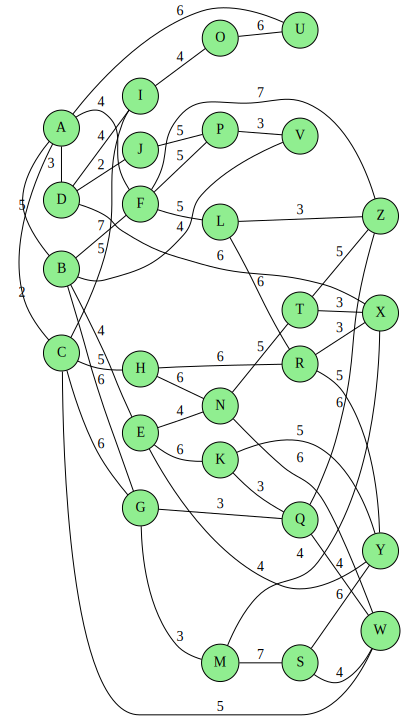

In [5]:
with open("grafo_individual.dot", "r") as f:
    dot_code = f.read()

Source(dot_code)

Los nodos adyancentes del grafo son los siguientes:

In [8]:
grafo_letras = {
  'A': ['B', 'C', 'D', 'F', 'U'],
  'B': ['A', 'E', 'F', 'G', 'V' ],
  'C': ['A', 'G', 'H', 'I', 'W'],
  'D': ['A', 'I', 'J', 'X'],
  'E': ['B', 'K', 'N', 'Y'],
  'F': ['A', 'B', 'L', 'P', 'Z'],
  'G': ['B', 'C', 'M', 'Q'],
  'H': ['C', 'N', 'R'],
  'I': ['C', 'D', 'O'],
  'J': ['D', 'P'],
  'K': ['E', 'Q', 'Y'],
  'L': ['F', 'R', 'Z'],
  'M': ['G', 'S', 'X'],
  'N': ['E', 'H', 'T', 'W'],
  'O': ['I', 'U'],
  'P': ['F', 'J', 'V'],
  'Q': ['G', 'K', 'W', 'Z'],
  'R': ['H', 'L', 'X', 'Y'],
  'S': ['M', 'W', 'Y'],
  'T': ['N', 'X', 'Z'],
  'U': ['A', 'O'],
  'V': ['B', 'P'],
  'W': ['C', 'N', 'Q', 'S'],
  'X': ['D', 'M', 'R', 'T'],
  'Y': ['E', 'K', 'R', 'S'],
  'Z': ['F', 'L', 'Q', 'T'], 
}

grafo_kruskal = {
    'A': [('B', 5), ('C', 2), ('D', 3), ('F', 4), ('U', 6)],
    'B': [('A', 5), ('E', 4), ('F', 7), ('G', 6), ('V', 4)],
    'C': [('A', 2), ('G', 6), ('H', 5), ('I', 5), ('W', 5)],
    'D': [('A', 3), ('I', 4), ('J', 2), ('X', 6)],
    'E': [('B', 4), ('K', 6), ('N', 4), ('Y', 4)],
    'F': [('A', 4), ('B', 7), ('L', 5), ('P', 5), ('Z', 7)],
    'G': [('B', 6), ('C', 6), ('M', 3), ('Q', 3)],
    'H': [('C', 5), ('N', 6), ('R', 6)],
    'I': [('C', 5), ('D', 4), ('O', 4)],
    'J': [('D', 2), ('P', 5)],
    'K': [('E', 6), ('Q', 3), ('Y', 5)],
    'L': [('F', 5), ('R', 6), ('Z', 3)],
    'M': [('G', 3), ('S', 7), ('X', 4)],
    'N': [('E', 4), ('H', 6), ('T', 5), ('W', 6)],
    'O': [('I', 4), ('U', 6)],
    'P': [('F', 5), ('J', 5), ('V', 3)],
    'Q': [('G', 3), ('K', 3), ('W', 4), ('Z', 6)],
    'R': [('H', 6), ('L', 6), ('X', 3), ('Y', 5)],
    'S': [('M', 7), ('W', 4), ('Y', 6)],
    'T': [('N', 5), ('X', 3), ('Z', 5)],
    'U': [('A', 6), ('O', 6)],
    'V': [('B', 3), ('P', 5)],
    'W': [('C', 5), ('N', 6), ('Q', 4), ('S', 4)],
    'X': [('D', 6), ('M', 4), ('R', 3), ('T', 3)],
    'Y': [('E', 4), ('K', 5), ('R', 5), ('S', 6)],
    'Z': [('F', 7), ('L', 3), ('Q', 6), ('T', 5)],
}

Algoritmo DFS - Pila

In [28]:
df = dfs(grafo_letras, 'H')

with pd.option_context("display.max_colwidth", None):
    display(df.style.hide(axis="index"))

Iteración,Long. camino,Actual,Predecesor,Pila
1,0,H,None,"['C', 'N', 'R']"
2,1,R,H,"['C', 'N', 'L', 'X', 'Y']"
3,2,Y,R,"['C', 'N', 'L', 'X', 'E', 'K', 'S']"
4,3,S,Y,"['C', 'N', 'L', 'X', 'E', 'K', 'M', 'W']"
5,4,W,S,"['C', 'N', 'L', 'X', 'E', 'K', 'M', 'Q']"
6,5,Q,W,"['C', 'N', 'L', 'X', 'E', 'K', 'M', 'G', 'Z']"
7,6,Z,Q,"['C', 'N', 'L', 'X', 'E', 'K', 'M', 'G', 'F', 'T']"
8,7,T,Z,"['C', 'N', 'L', 'X', 'E', 'K', 'M', 'G', 'F']"
9,7,F,Z,"['C', 'N', 'L', 'X', 'E', 'K', 'M', 'G', 'A', 'B', 'P']"
10,8,P,F,"['C', 'N', 'L', 'X', 'E', 'K', 'M', 'G', 'A', 'B', 'J', 'V']"


Algoritmo BFS - Cola

In [25]:
df = bfs(grafo_letras, 'H')

with pd.option_context("display.max_colwidth", None):
    display(df.style.hide(axis="index"))

Iteración,Longitud de camino,Actual,Predecesor,Cola
1,0,H,None,[]
2,1,C,H,"['N', 'R']"
3,1,N,H,"['R', 'A', 'G', 'I', 'W']"
4,1,R,H,"['A', 'G', 'I', 'W', 'E', 'T']"
5,2,A,C,"['G', 'I', 'W', 'E', 'T', 'L', 'X', 'Y']"
6,2,G,C,"['I', 'W', 'E', 'T', 'L', 'X', 'Y', 'B', 'D', 'F', 'U']"
7,2,I,C,"['W', 'E', 'T', 'L', 'X', 'Y', 'B', 'D', 'F', 'U', 'M', 'Q']"
8,2,W,C,"['E', 'T', 'L', 'X', 'Y', 'B', 'D', 'F', 'U', 'M', 'Q', 'O']"
9,2,E,N,"['T', 'L', 'X', 'Y', 'B', 'D', 'F', 'U', 'M', 'Q', 'O', 'S']"
10,2,T,N,"['L', 'X', 'Y', 'B', 'D', 'F', 'U', 'M', 'Q', 'O', 'S', 'K']"


Algoritmo de Kruskal

In [15]:
df, peso_total = kruskal(grafo_kruskal)

with pd.option_context("display.max_colwidth", None):
    display(df.style.hide(axis="index"))




Resultado del algoritmo paso a paso:


,Iteración,"Arista (u, v)",Peso
0,1,"(A, C)",2
1,2,"(D, J)",2
2,3,"(A, D)",3
3,4,"(G, M)",3
4,5,"(G, Q)",3
5,6,"(K, Q)",3
6,7,"(L, Z)",3
7,8,"(P, V)",3
8,9,"(R, X)",3
9,10,"(T, X)",3
